Zaimportowanie potrzebnych bibliotek

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from scipy.stats import f_oneway, kruskal
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

Wczytanie danych z pliku excel

In [ ]:
df = pd.read_excel("WAD2ProjektDane.xlsx", sheet_name="Dane")
df

,Kraj,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,Bułgaria,75.0,65.8,90.9,7.868834,7.33,0.667711,43.2,4.4,-9.412744,81.8
1,Niemcy,81.0,65.8,82.2,7.994458,11.47,0.944544,46.7,0.6,-11.565851,98.6
2,Irlandia,82.2,69.4,88.1,2.981012,6.86,1.773162,45.9,3.8,-6.413038,97.8
3,Hiszpania,83.5,68.0,86.5,2.981258,9.00,0.744666,44.6,1.3,-9.169694,98.1
4,Francja,82.8,63.9,81.7,5.899736,11.21,1.399005,52.1,0.5,-9.098603,97.2
5,Chorwacja,78.2,57.5,78.1,5.719494,6.69,0.809099,42.9,0.8,-13.289603,92.9
6,Włochy,83.4,66.8,87.1,3.165834,8.68,0.894428,48.2,1.4,-10.559953,95.0
7,Cypr,82.9,62.2,83.8,3.203986,6.83,0.850462,45.0,3.5,-6.852295,95.7
8,Łotwa,75.1,52.3,71.1,5.473074,6.19,0.712890,43.1,1.2,-14.772700,90.4
9,Litwa,76.0,57.7,80.5,6.377822,6.53,0.997452,45.2,2.4,-13.827047,89.2


Podział danych na dwa zbiory (7 zmiennych do stworzenia grup/klastrów; 3 zmienne do oceny grupowania)

In [ ]:
X_grouping = df.iloc[:, 1:8].values  # Zmienna do grupowania
X_evaluation = df.iloc[:, 8:].values  # Zmienna do oceny

countries = df['Kraj'].values

X_grouping = pd.DataFrame(X_grouping, columns=['x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x10'])
X_grouping

X_evaluation = pd.DataFrame(X_evaluation, columns=['x1', 'x4', 'x9'])
X_evaluation

,x1,x4,x9
0,4.4,-9.412744,81.8
1,0.6,-11.565851,98.6
2,3.8,-6.413038,97.8
3,1.3,-9.169694,98.1
4,0.5,-9.098603,97.2
5,0.8,-13.289603,92.9
6,1.4,-10.559953,95.0
7,3.5,-6.852295,95.7
8,1.2,-14.772700,90.4
9,2.4,-13.827047,89.2


Standaryzacja danych

In [ ]:
scaler = StandardScaler()
X_scaled_grouping = X_grouping.copy()
X_scaled_evaluation = X_evaluation.copy()

X_scaled_grouping = scaler.fit_transform(X_scaled_grouping)
X_scaled_evaluation = scaler.fit_transform(X_scaled_evaluation)

X_scaled_grouping = pd.DataFrame(X_scaled_grouping, columns=['x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x10'])
X_scaled_grouping

X_scaled_evaluation = pd.DataFrame(X_scaled_evaluation, columns=['x1', 'x4', 'x9'])
X_scaled_evaluation


,x1,x4,x9
0,1.535300,0.284337,-3.028003
1,-1.262849,-0.654298,0.700135
2,1.093487,1.592041,0.522605
3,-0.747400,0.390293,0.589179
4,-1.336484,0.421285,0.389457
5,-1.115578,-1.405758,-0.564769
6,-0.673765,-0.215782,-0.098751
7,0.872581,1.400550,0.056588
8,-0.821036,-2.052305,-1.119551
9,0.062590,-1.640053,-1.385847


Charakterystyki dla zestandaryzowanego zbioru danych (Odchylenie standardowe, średnia, kwantyle,...)

In [ ]:
X_scaled_grouping.describe()

,x2,x3,x5,x6,x7,x8,x10
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,5.462297e-15,1.887379e-16,8.770762e-16,-2.761680e-16,-5.551115e-17,-1.193490e-16,1.776357e-15
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.850761e+00,-1.853339e+00,-1.603156e+00,-1.503195e+00,-1.609322e+00,-1.546055e+00,-1.964402e+00
25%,-8.281033e-01,-7.926667e-01,-8.588337e-01,-8.876516e-01,-9.214625e-01,-6.477318e-01,-5.933486e-01
50%,4.273545e-01,-1.073767e-01,1.908519e-01,-1.776062e-01,4.963381e-02,-3.363735e-01,-2.602678e-01
75%,7.432975e-01,7.306851e-01,7.710418e-01,7.540936e-01,7.941410e-01,4.381814e-01,6.770062e-01
max,1.075869e+00,1.725883e+00,1.648961e+00,1.904893e+00,1.600690e+00,2.299096e+00,2.063552e+00


Badanie rozkadu cech grupujących

Wybór rodzajów odległości które zostaną użyte do klasteryzacji

In [ ]:
distances = ['euclidean', 'manhattan', 'cosine', 'l2', 'chebyshev']

Wykorzystanie metody K-Średnich z pięcioma rodzajami odległości oraz zapisanie oraz wyświetlenie wyników

In [ ]:
kmeans_results = {}

def kmeans_with_distance(X, distance_metric, n_clusters=3):
    dist_matrix = pairwise_distances(X, metric=distance_metric)
    kmeans = KMeans(n_clusters=n_clusters, random_state=666)
    kmeans.fit(dist_matrix)
    kmeans_results[distance_metric] = kmeans.labels_
    return kmeans.labels_

for distance in distances:
    labels = kmeans_with_distance(X_scaled_grouping, distance)
    print(f"Klasteryzacja przy miarze {distance}:")
    cluster_ass = pd.DataFrame({
    "Country": countries,
    "Cluster": labels
    })
    print(cluster_ass.sort_values("Cluster"))
    print("----------------------------")


Klasteryzacja przy miarze euclidean:
       Country  Cluster
0     Bułgaria        0
15    Słowenia        0
14     Rumunia        0
12      Polska        0
8        Łotwa        0
9        Litwa        0
5    Chorwacja        0
6       Włochy        1
7         Cypr        1
18    Norwegia        1
10       Malta        1
3    Hiszpania        1
2     Irlandia        1
1       Niemcy        1
17     Szwecja        1
4      Francja        2
11    Holandia        2
13  Portugalia        2
16   Finlandia        2
19  Szwajcaria        2
----------------------------
Klasteryzacja przy miarze manhattan:
       Country  Cluster
0     Bułgaria        0
15    Słowenia        0
14     Rumunia        0
12      Polska        0
8        Łotwa        0
9        Litwa        0
5    Chorwacja        0
6       Włochy        1
7         Cypr        1
18    Norwegia        1
10       Malta        1
3    Hiszpania        1
2     Irlandia        1
1       Niemcy        1
17     Szwecja        1
4      Fr

Wyświetlenie wykresów dla metody klasteryzacji K-średnich dla 5 wariantów obliczania odległości. Użyta wielowymiarowa wizualizacja uproszczona PCA do dwóch składowych

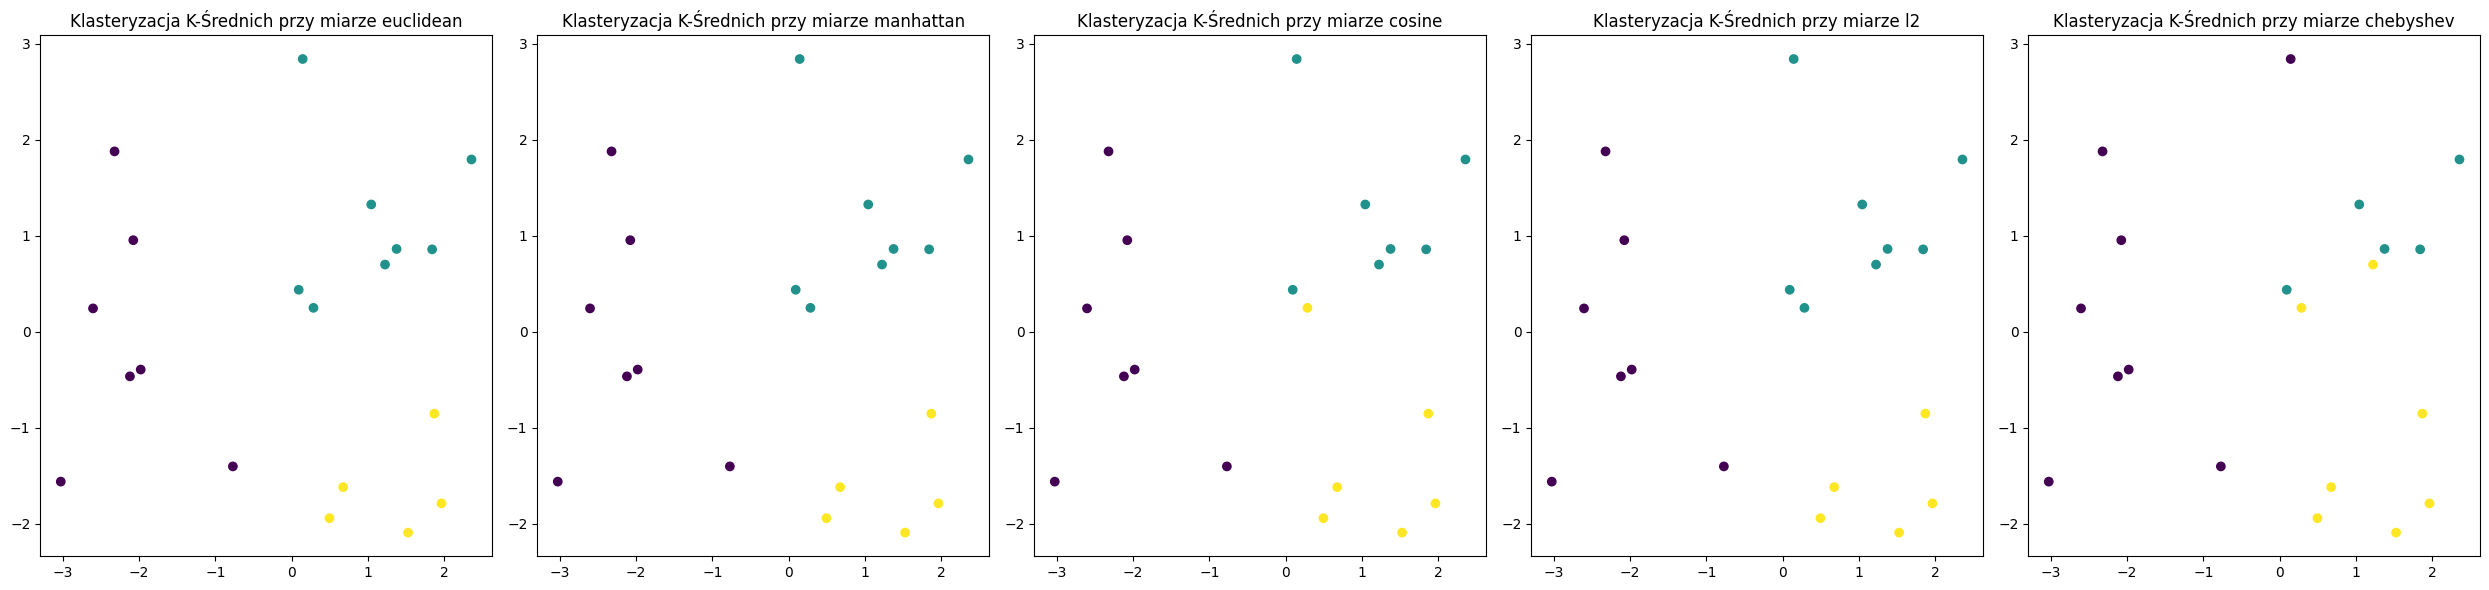

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled_grouping)

n_metrics = len(distances)
fig, axes = plt.subplots(1, n_metrics, figsize=(5 * n_metrics, 6))

if n_metrics == 1:
    axes = [axes]

for i, distance in enumerate(distances):
    labels = kmeans_results[distance]
    axes[i].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
    axes[i].set_title(f'Klasteryzacja K-Średnich przy miarze {distance}')

plt.tight_layout()
plt.show()

Wykorzystanie metody Klasteryzacji Aglomeracyjnej z pięcioma rodzajami odległości oraz zapisanie i wyświetlenie wyników

In [ ]:
agglomerative_results = {}

for distance in distances:
    dist_matrix = pairwise_distances(X_scaled_grouping, metric=distance)
    agglom = AgglomerativeClustering(n_clusters=3, linkage='average')
    labels = agglom.fit_predict(dist_matrix)
    agglomerative_results[distance] = labels

    print(f"Klasteryzacja przy miarze {distance}:")
    cluster_ass = pd.DataFrame({
    "Country": countries,
    "Cluster": labels
    })
    print(cluster_ass.sort_values("Cluster"))
    print("----------------------------")

Klasteryzacja przy miarze euclidean:
       Country  Cluster
19  Szwajcaria        0
1       Niemcy        0
16   Finlandia        0
15    Słowenia        0
4      Francja        0
13  Portugalia        0
11    Holandia        0
14     Rumunia        1
12      Polska        1
0     Bułgaria        1
8        Łotwa        1
5    Chorwacja        1
9        Litwa        1
10       Malta        2
7         Cypr        2
6       Włochy        2
3    Hiszpania        2
2     Irlandia        2
17     Szwecja        2
18    Norwegia        2
----------------------------
Klasteryzacja przy miarze manhattan:
       Country  Cluster
1       Niemcy        0
2     Irlandia        0
3    Hiszpania        0
17     Szwecja        0
6       Włochy        0
7         Cypr        0
18    Norwegia        0
10       Malta        0
0     Bułgaria        1
14     Rumunia        1
12      Polska        1
9        Litwa        1
8        Łotwa        1
5    Chorwacja        1
13  Portugalia        2
15    Sło

Wyświetlenie wykresów dla metody Klasteryzacji Aglomeracyjnej dla 5 wariantów obliczania odległości.

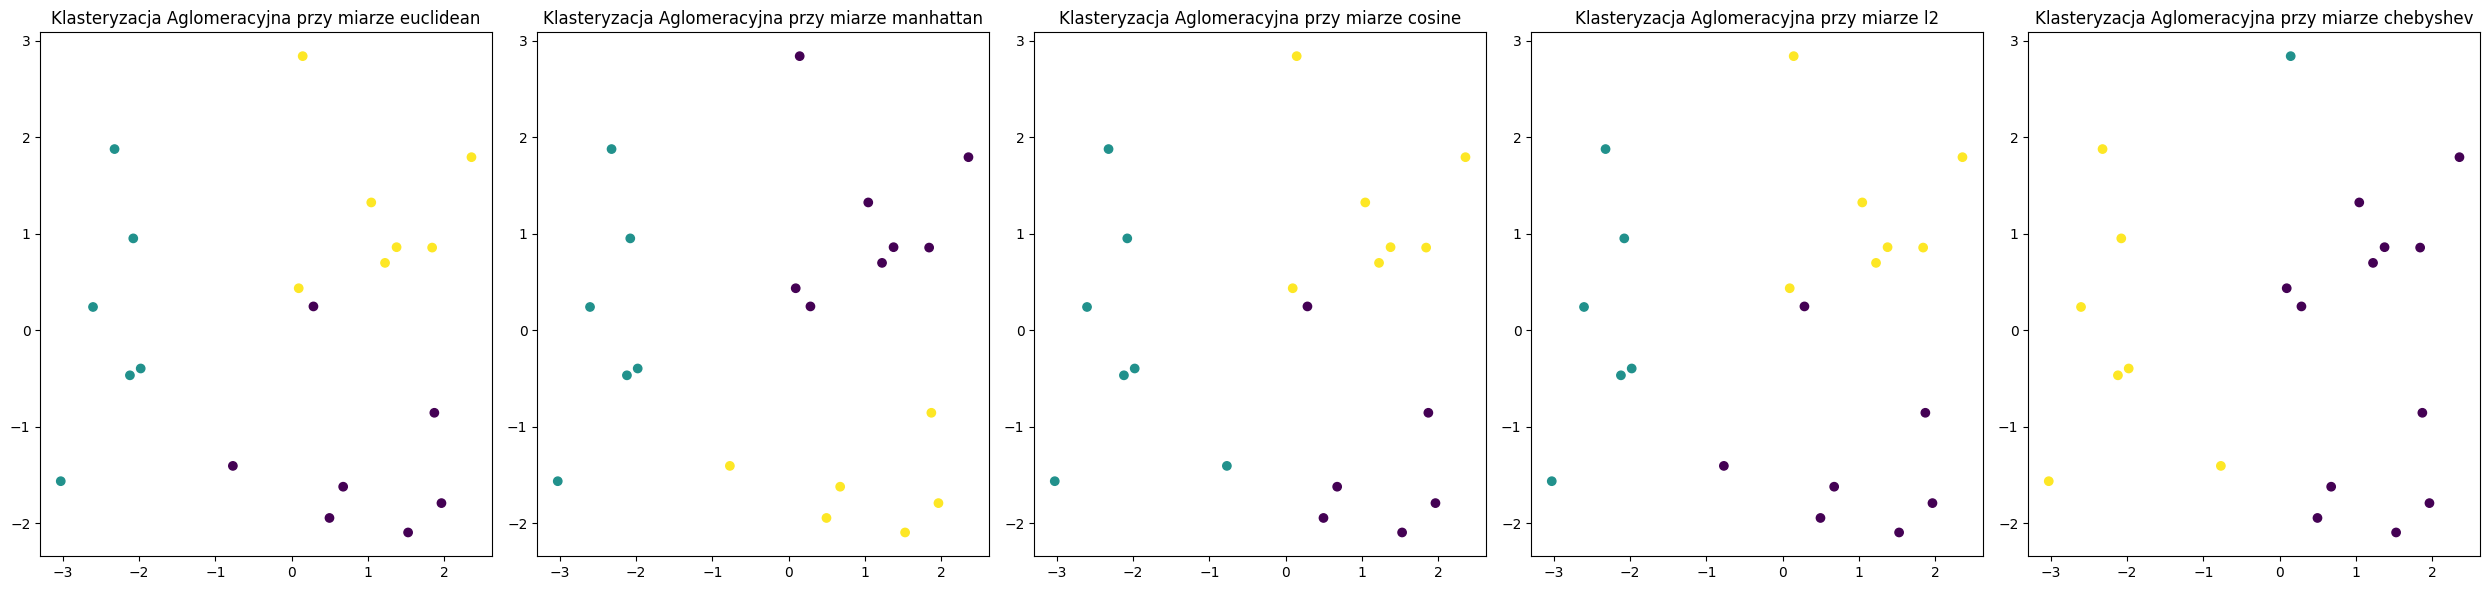

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled_grouping)

n_metrics = len(distances)
fig, axes = plt.subplots(1, n_metrics, figsize=(5 * n_metrics, 6))

if n_metrics == 1:
    axes = [axes]

for i, distance in enumerate(distances):
    labels = agglomerative_results[distance]
    axes[i].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
    axes[i].set_title(f'Klasteryzacja Aglomeracyjna przy miarze {distance}')

plt.tight_layout()
plt.show()

Wykorzystanie metody Mieszanki Gaussa z pięcioma rodzajami odległości oraz zapisanie i wyświetlenie wyników

In [ ]:
from sklearn.mixture import GaussianMixture
gaussian_results = {}

for distance in distances:
    dist_matrix = pairwise_distances(X_scaled_grouping, metric=distance)
    gmm = GaussianMixture(n_components=3, random_state=666)
    gaussian_results[distance] = gmm.fit_predict(dist_matrix)
    print(f"Klasteryzacja przy miarze {distance}:")
    cluster_ass = pd.DataFrame({
    "Country": countries,
    "Cluster": gaussian_results[distance]
    })
    print(cluster_ass.sort_values("Cluster"))
    print("----------------------------")

Klasteryzacja przy miarze euclidean:
       Country  Cluster
0     Bułgaria        0
15    Słowenia        0
14     Rumunia        0
12      Polska        0
8        Łotwa        0
9        Litwa        0
5    Chorwacja        0
6       Włochy        1
7         Cypr        1
18    Norwegia        1
10       Malta        1
3    Hiszpania        1
2     Irlandia        1
1       Niemcy        1
17     Szwecja        1
4      Francja        2
11    Holandia        2
13  Portugalia        2
16   Finlandia        2
19  Szwajcaria        2
----------------------------
Klasteryzacja przy miarze manhattan:
       Country  Cluster
0     Bułgaria        0
15    Słowenia        0
14     Rumunia        0
12      Polska        0
8        Łotwa        0
9        Litwa        0
5    Chorwacja        0
6       Włochy        1
7         Cypr        1
18    Norwegia        1
10       Malta        1
3    Hiszpania        1
2     Irlandia        1
1       Niemcy        1
17     Szwecja        1
4      Fr

Wyświetlenie wykresów dla metody Mieszanki Gaussa dla 5 wariantów obliczania odległości

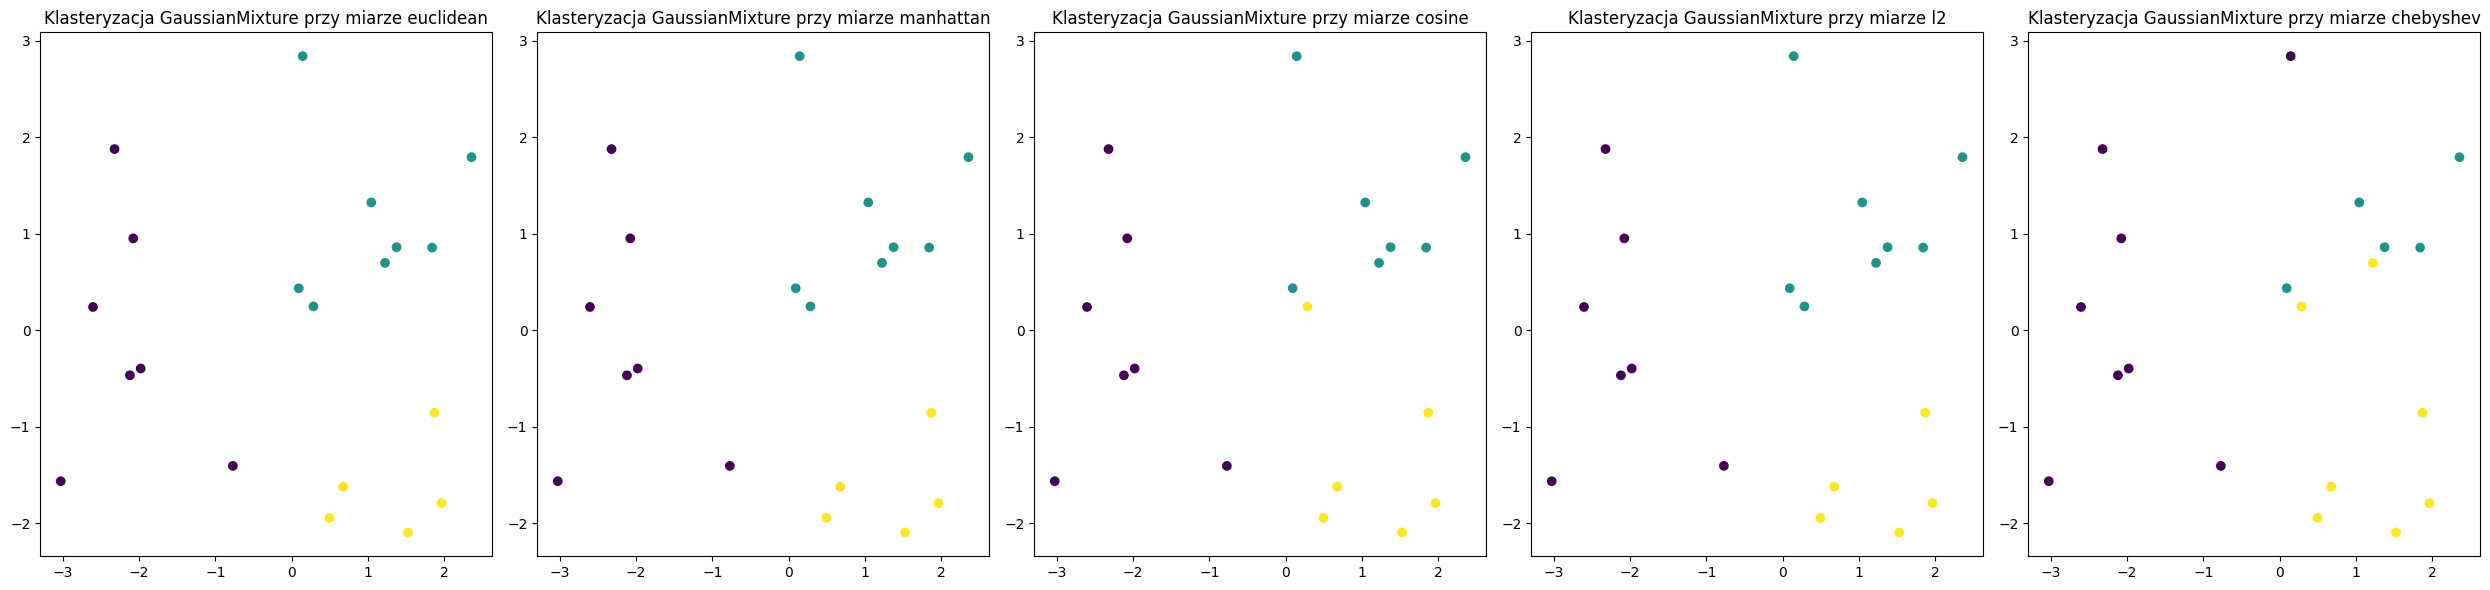

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled_grouping)

n_metrics = len(distances)
fig, axes = plt.subplots(1, n_metrics, figsize=(5 * n_metrics, 6))

if n_metrics == 1:
    axes = [axes]

for i, distance in enumerate(distances):
    labels = gaussian_results[distance]
    axes[i].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
    axes[i].set_title(f'Klasteryzacja GaussianMixture przy miarze {distance}')

plt.tight_layout()
plt.show()

Wybór metody przy pomocy której została dokonana najlepsza klasyeryzacja przy pomocy Silouette Score (Wskaźnik Sylwetkowy).

In [ ]:
def compute_silhouette(X, labels, metric):
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        return silhouette_score(X[mask], labels[mask], metric=metric)
    else:
        return None

results_table = pd.DataFrame(columns=["Method", "Metric", "Silhouette Score"])

for method, results in {
    "K-means": kmeans_results,
    "Agglomerative": agglomerative_results,
    "GaussianMixture": gaussian_results,
}.items():
    for metric, labels in results.items():
        try:
            X_input = X_scaled_grouping
            score = compute_silhouette(
                X_input,
                labels,
                metric
            )

            results_table = pd.concat([results_table, pd.DataFrame([{"Method": method, "Metric": metric, "Silhouette Score": score}])], ignore_index=True)

        except Exception as e:
            print(f"Błąd przy obliczaniu silhouette dla metody {method}, metryki {metric}: {e}")
            results_table = pd.concat([results_table, pd.DataFrame([{"Method": method, "Metric": metric, "Silhouette Score": score}])], ignore_index=True)

best_result = results_table.dropna(subset=["Silhouette Score"]).sort_values(
    "Silhouette Score", ascending=False
).iloc[0]

print(
    f"Najlepsza metoda i metryka: ({best_result['Method']}, {best_result['Metric']}) "
    f"(Silhouette Score: {best_result['Silhouette Score']:.3f})"
)

print(results_table)

Najlepsza metoda i metryka: (K-means, cosine) (Silhouette Score: 0.525)
             Method     Metric  Silhouette Score
0           K-means  euclidean          0.305528
1           K-means  manhattan          0.328795
2           K-means     cosine          0.524525
3           K-means         l2          0.305528
4           K-means  chebyshev          0.246494
5     Agglomerative  euclidean          0.322414
6     Agglomerative  manhattan          0.335735
7     Agglomerative     cosine          0.524525
8     Agglomerative         l2          0.322414
9     Agglomerative  chebyshev          0.172051
10  GaussianMixture  euclidean          0.305528
11  GaussianMixture  manhattan          0.328795
12  GaussianMixture     cosine          0.524525
13  GaussianMixture         l2          0.305528
14  GaussianMixture  chebyshev          0.246494


Wyświetlenie krajów oraz ich przynależności do klastrów dla najlepszej wybranej metody

       Country  Cluster
19  Szwajcaria        0
1       Niemcy        0
16   Finlandia        0
4      Francja        0
13  Portugalia        0
11    Holandia        0
15    Słowenia        1
14     Rumunia        1
12      Polska        1
0     Bułgaria        1
8        Łotwa        1
5    Chorwacja        1
9        Litwa        1
10       Malta        2
7         Cypr        2
6       Włochy        2
3    Hiszpania        2
2     Irlandia        2
17     Szwecja        2
18    Norwegia        2


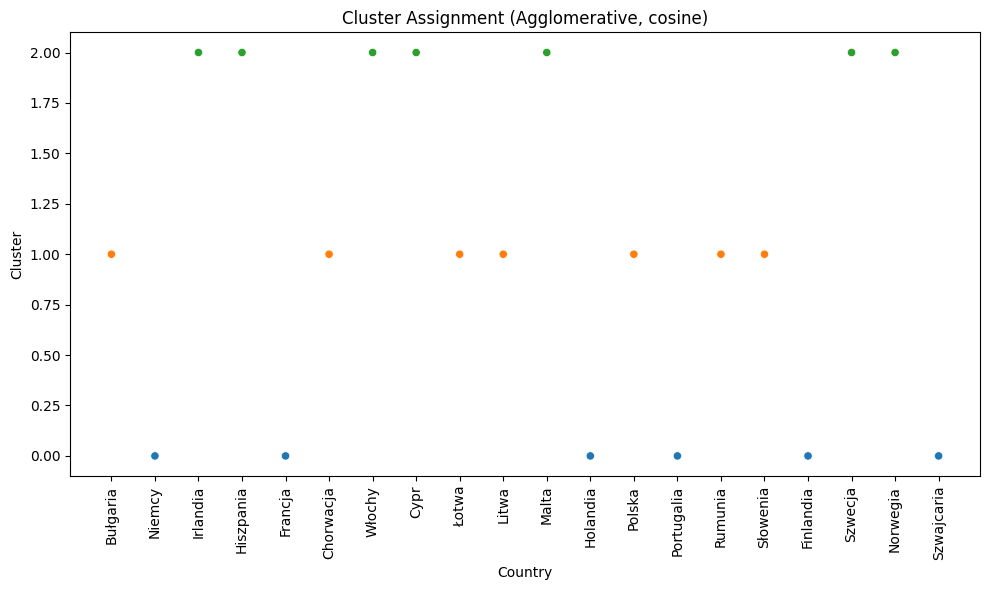

In [ ]:

labels = agglomerative_results[best_result['Metric']]

cluster_assignment = pd.DataFrame({
    "Country": countries,
    "Cluster": labels
}).sort_values("Cluster")

print(cluster_assignment)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=[i for i in range(len(countries))],
    y=labels,
    hue=labels,
    palette="tab10",
    legend=None
)
plt.xticks(ticks=range(len(countries)), labels=countries, rotation=90)
plt.xlabel("Country")
plt.ylabel("Cluster")
plt.title(f"Cluster Assignment (Agglomerative, {best_result['Metric']})")
plt.tight_layout()
plt.show()

Wyświetlenie rozkładów dla najlepszej wybranej metody. W naszym przypadku jest to metoda Aglomeracyjna z metryką cosine.

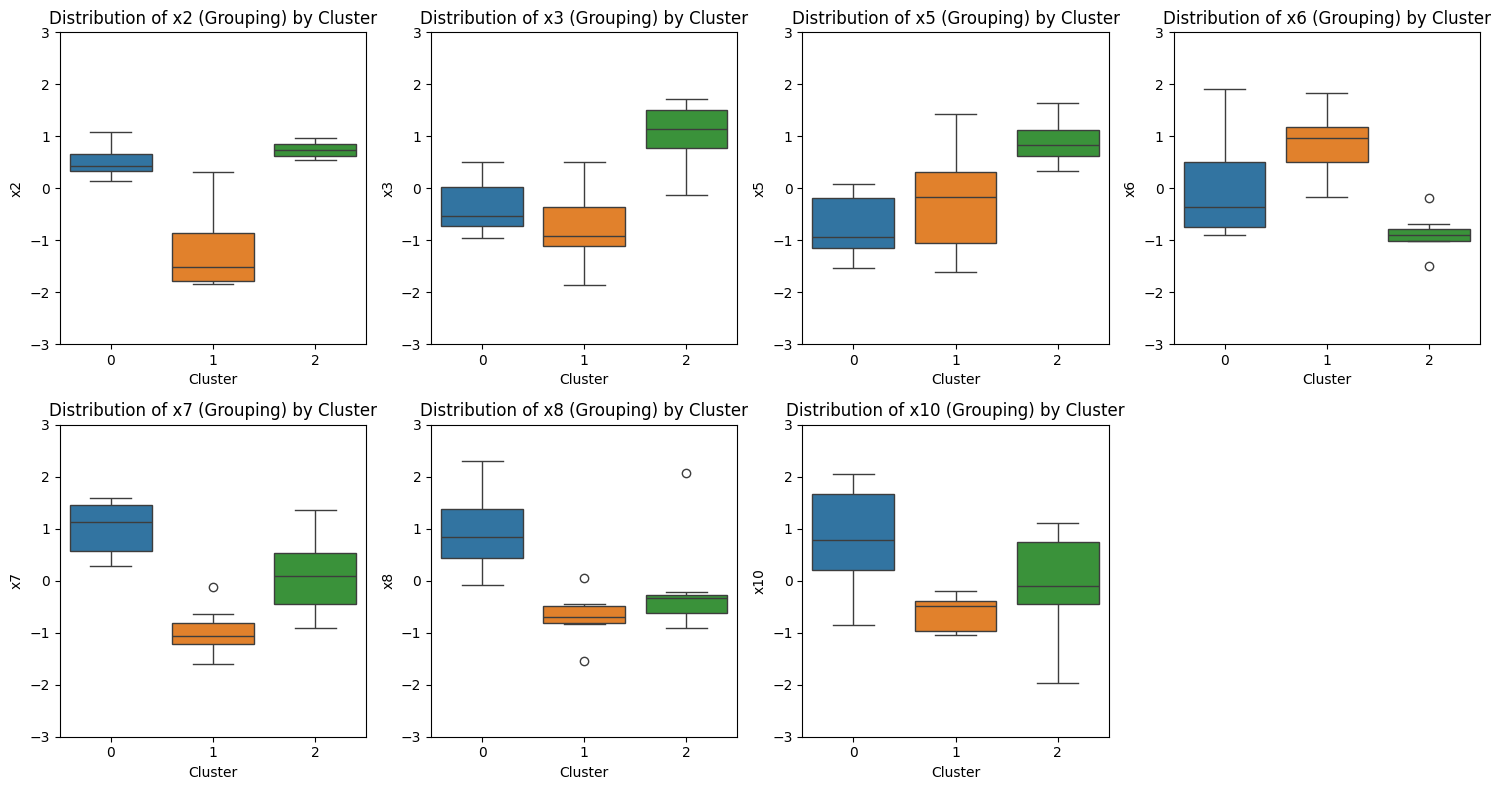

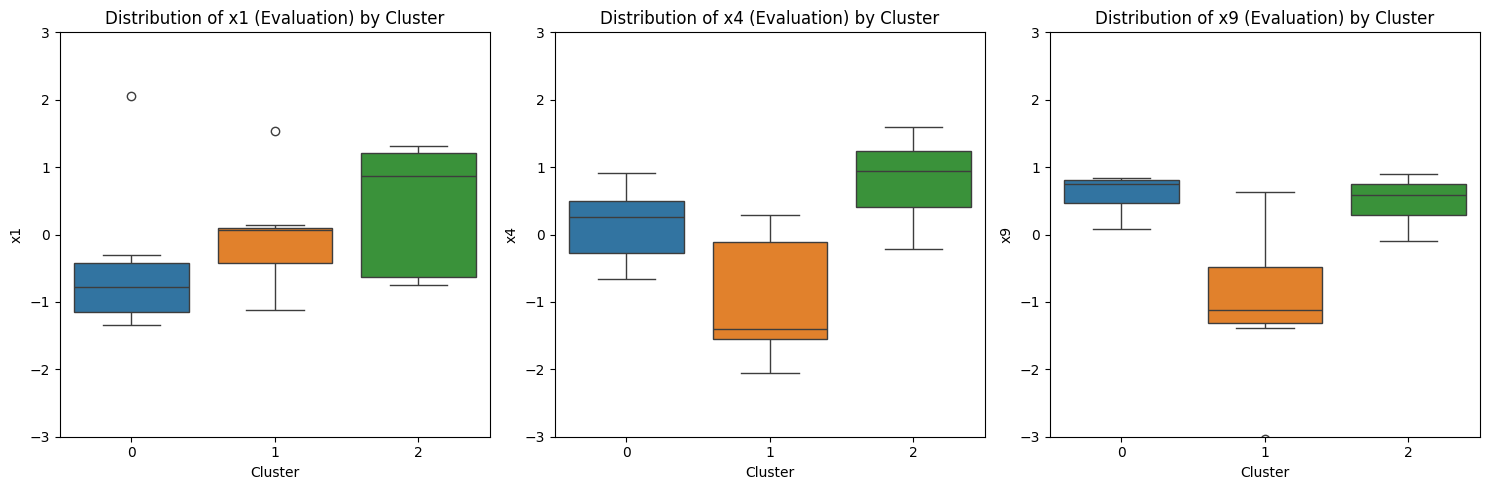

In [ ]:
best_labels = agglomerative_results["cosine"]

data_grouping = pd.DataFrame(X_scaled_grouping, columns=['x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x10'])
data_evaluation = pd.DataFrame(X_scaled_evaluation, columns=['x1', 'x4', 'x9'])
data_grouping["Cluster"] = agglomerative_results["cosine"]

data_with_clusters = pd.concat([data_grouping, data_evaluation], axis=1)

cluster_summary_grouping = data_grouping.groupby("Cluster").agg(["mean", "median", "std"])
cluster_summary_evaluation = data_evaluation.groupby(data_grouping["Cluster"]).agg(["mean", "median", "std"])


plt.figure(figsize=(15, 8))
i = 1
for c in ['x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x10']:
    plt.subplot(2, 4, i)
    sns.boxplot(
        x="Cluster", y=f"{c}", data=data_with_clusters, palette="tab10"
    )
    plt.title(f"Distribution of {c} (Grouping) by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(f"{c}")
    plt.ylim(-3, 3)
    i += 1

plt.tight_layout()
plt.show()


i = 1
plt.figure(figsize=(15, 5))
for c in ['x1', 'x4', 'x9']:
    plt.subplot(1, 3, i)
    sns.boxplot(
        x="Cluster", y=f"{c}", data=data_with_clusters, palette="tab10"
    )
    plt.title(f"Distribution of {c} (Evaluation) by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(f"{c}")
    plt.ylim(-3, 3)
    i += 1

plt.tight_layout()
plt.show()

Wnioski:

Podział na klastry został przeprowadzony na podstawie cech opisujących poziom zdrowia w krajach, a jego sensowność została zweryfikowana z użyciem trzech dodatkowych cech, w tym średniej długości życia (x1). Chociaż długość życia między krajami nie różni się drastycznie, co jest zgodne z globalnymi trendami, analiza wykazała, że podział na klastry jest udany. Wartości cech weryfikacyjnych (x1, x4, x9) są spójne wewnątrz grup, co sugeruje, że kraje w tym samym klastrze mają podobne charakterystyki zdrowotne.

Choć różnice między klastrami w tych trzech cechach mogłyby być bardziej wyraziste, obecne wyniki wskazują, że klasteryzacja oddaje rzeczywiste podziały i jest uzasadniona. Cechy x4 i x9, które wykazują większe zróżnicowanie, dodatkowo potwierdzają, że podział uwzględnia różnice w różnych aspektach zdrowotnych. W kontekście cechy x1, niska zmienność między krajami nie wprowadzała losowości do klasyfikacji, co świadczy o jej spójności.

Podsumowując, podział na klastery jest trafny i odzwierciedla rzeczywiste różnice między krajami, a analiza cech kontrolnych potwierdza, że grupowanie jest poprawne i użyteczne.

Wizualicja w 2D (przypomnienie)

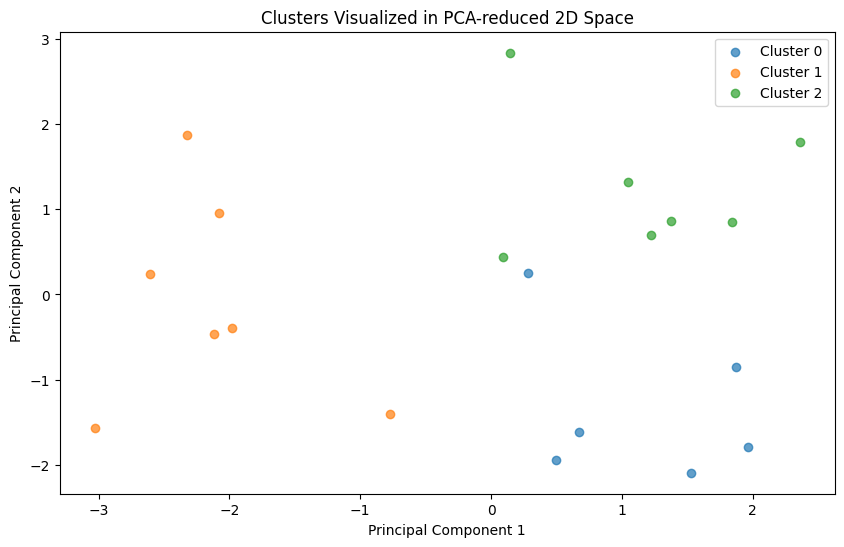

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_grouping)

plt.figure(figsize=(10, 6))
for cluster in np.unique(best_labels):
    cluster_points = X_pca[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.title("Clusters Visualized in PCA-reduced 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Charakterystyki klastrów dla metody Aglomeracyjnej z metryką cosine

In [ ]:

grouped_data = pd.DataFrame(X_scaled_grouping)
grouped_data['Cluster'] = agglomerative_results['cosine']


cluster_summary = grouped_data.groupby('Cluster').agg(['mean', 'std'])
cluster_summary

x2                  x3                  x5                  x6  \
             mean       std      mean       std      mean       std      mean   
Cluster                                                                         
0        0.521583  0.335002 -0.351811  0.571653 -0.745595  0.663518  0.036438   
1       -1.195120  0.787878 -0.743406  0.774996 -0.263921  1.085712  0.856515   
2        0.748049  0.166760  1.044958  0.646478  0.903002  0.446310 -0.887747   

                         x7                  x8                 x10            
              std      mean       std      mean       std      mean       std  
Cluster                                                                        
0        1.087677  1.018932  0.561424  0.958405  0.852931  0.793197  1.104883  
1        0.644134 -0.976568  0.478835 -0.682189  0.484635 -0.627653  0.345688  
2        0.394837  0.103198  0.823472 -0.139301  1.004039 -0.052231  1.050989

Dodanie etykiet klastrów do zbioru danych

In [ ]:

labeled_data = pd.DataFrame(X_scaled_grouping)
labeled_data['Cluster'] = best_labels


labeled_data.head()


,x2,x3,x5,x6,x7,x8,x10,Cluster
0,-1.850761,0.503710,1.419938,1.831702,-0.632831,-0.808741,-0.941922,1
1,0.144669,0.503710,0.091609,1.904893,1.600690,-0.086959,0.142528,0
2,0.543755,1.132256,0.992430,-1.016061,-0.886395,2.073480,-0.105346,2
3,0.976098,0.887822,0.748140,-1.015918,0.268130,-0.608097,-0.508142,2
4,0.743298,0.171977,0.015268,0.684457,1.460421,1.097948,1.815678,0


Dodanie etykiet krajów do jakiego klastra należą

In [ ]:
labeled_data['Country'] = countries
labeled_data[['Country', 'Cluster']].sort_values('Cluster')

,Country,Cluster
19,Szwajcaria,0
1,Niemcy,0
16,Finlandia,0
4,Francja,0
13,Portugalia,0
11,Holandia,0
15,Słowenia,1
14,Rumunia,1
12,Polska,1
0,Bułgaria,1


Wyświetlenie Klastrów pokazując, które Państwa zawierają

In [ ]:

for cluster in sorted(labeled_data['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(labeled_data[labeled_data['Cluster'] == cluster]['Country'].values)
    print("\n")


Cluster 0:
['Niemcy' 'Francja' 'Holandia' 'Portugalia' 'Finlandia' 'Szwajcaria']


Cluster 1:
['Bułgaria' 'Chorwacja' 'Łotwa' 'Litwa' 'Polska' 'Rumunia' 'Słowenia']


Cluster 2:
['Irlandia' 'Hiszpania' 'Włochy' 'Cypr' 'Malta' 'Szwecja' 'Norwegia']




Porównanie grup ANOVA

In [ ]:
from scipy.stats import f_oneway

for col in labeled_data.columns[:-2]:
    cluster_groups = [labeled_data[labeled_data['Cluster'] == cluster][col] for cluster in labeled_data['Cluster'].unique()]
    stat, p_value = f_oneway(*cluster_groups)
    print(f"ANOVA for {col}: F-statistic = {stat:.2f}, p-value = {p_value:.4f}")


ANOVA for x2: F-statistic = 29.68, p-value = 0.0000
ANOVA for x3: F-statistic = 13.45, p-value = 0.0003
ANOVA for x5: F-statistic = 7.74, p-value = 0.0041
ANOVA for x6: F-statistic = 9.70, p-value = 0.0015
ANOVA for x7: F-statistic = 15.72, p-value = 0.0001
ANOVA for x8: F-statistic = 6.82, p-value = 0.0067
ANOVA for x10: F-statistic = 4.14, p-value = 0.0343


Dla wszystkich wymienionych zmiennych (x2, x3, x5, x6, x7, x8, x10), P-wartości są znacznie mniejsze niż typowy próg 0.05, co sugeruje, że istnieją dowody na istnienie istotnych różnic między średnimi wartościami tych zmiennych w różnych klastrach. To oznacza, że zmienne te mają potencjalnie istotny wpływ na różnicowanie między klastrami danych, a dalsza analiza (np. testy post-hoc) może pomóc w identyfikacji, które konkretne grupy różnią się od siebie.

Dendrogram

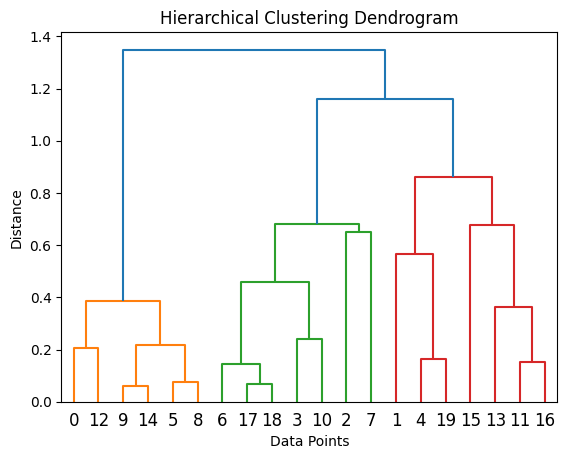

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(X_scaled_grouping, method='average', metric='cosine')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


          x1        x4        x9  Cluster
19 -0.821036  0.913165  0.811092        0
1  -1.262849 -0.654298  0.700135        0
16 -0.305587  0.084176  0.811092        0
3  -0.747400  0.390293  0.589179        0
4  -1.336484  0.421285  0.389457        0
6  -0.673765 -0.215782 -0.098751        0
13 -0.747400 -0.402537  0.078779        0
10 -0.600129  0.938495  0.677944        0
14 -0.011045 -1.448603 -1.230508        1
12  0.062590 -0.375447 -0.409429        1
0   1.535300  0.284337 -3.028003        1
8  -0.821036 -2.052305 -1.119551        1
5  -1.115578 -1.405758 -0.564769        1
9   0.062590 -1.640053 -1.385847        1
11  2.050748  0.514453  0.833283        2
7   0.872581  1.400550  0.056588        2
15  0.136226  0.153359  0.633562        2
2   1.093487  1.592041  0.522605        2
17  1.314393  0.434813  0.833283        2
18  1.314393  1.067817  0.899857        2


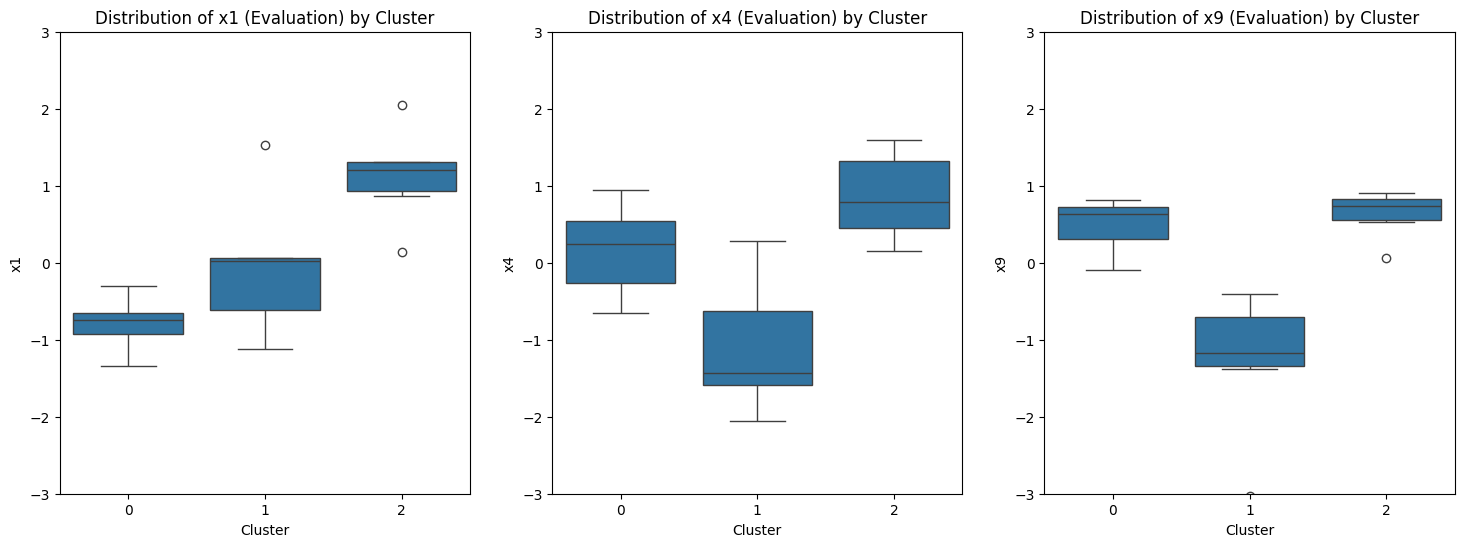

In [ ]:

dist_matrix = pairwise_distances(X_scaled_evaluation, metric='cosine')
agglom = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agglom.fit_predict(dist_matrix)

labeled_data_eval = pd.DataFrame(X_scaled_evaluation, columns=['x1', 'x4', 'x9'])
labeled_data_eval['Cluster'] = labels
print(labeled_data_eval.sort_values('Cluster'))
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(['x1', 'x4', 'x9']):

    sns.boxplot(x='Cluster', y=col, data=labeled_data_eval, ax=axes[i], )
    axes[i].set_title(f"Distribution of {col} (Evaluation) by Cluster")
    axes[i].set_ylim([-3, 3])

plt.show()



Tabela z przypisanymi państwami do klastrów dla cech z grupy drugiej sprawdzajacej [x1, x4, x9]


In [ ]:
cluster_assignment_eval = pd.DataFrame({
    "Country": countries,
    "Cluster": labels
}).sort_values("Cluster")

print(cluster_assignment_eval)

       Country  Cluster
19  Szwajcaria        0
1       Niemcy        0
16   Finlandia        0
3    Hiszpania        0
4      Francja        0
6       Włochy        0
13  Portugalia        0
10       Malta        0
14     Rumunia        1
12      Polska        1
0     Bułgaria        1
8        Łotwa        1
5    Chorwacja        1
9        Litwa        1
11    Holandia        2
7         Cypr        2
15    Słowenia        2
2     Irlandia        2
17     Szwecja        2
18    Norwegia        2


In [ ]:
labeled_data['Eval_cluster'] = labels
labeled_data['Diff'] = labeled_data['Cluster'] - labeled_data['Eval_cluster']
labeled_data[['Country', 'Cluster', 'Eval_cluster', 'Diff']].sort_values("Cluster")

,Country,Cluster,Eval_cluster,Diff
19,Szwajcaria,0,0,0
1,Niemcy,0,0,0
16,Finlandia,0,0,0
4,Francja,0,0,0
13,Portugalia,0,0,0
11,Holandia,0,2,-2
15,Słowenia,1,2,-1
14,Rumunia,1,1,0
12,Polska,1,1,0
0,Bułgaria,1,1,0
